In [8]:
import os
import pandas as pd


In [11]:
df = pd.read_excel('gs.xlsx')
df.head()


,A,gs,PARi,Exceltime,plant_num,genotype,time_since_off_sec,normalized_gs,normalized_A,Sheet
0,27.5,145,1000,44442.514850,P1,Ki11,-33,0.868263,0.989209,Sheet1
1,27.4,147,1000,44442.514931,P1,Ki11,-26,0.880240,0.985612,Sheet1
2,27.5,150,1000,44442.515000,P1,Ki11,-20,0.898204,0.989209,Sheet1
3,27.6,153,1000,44442.515093,P1,Ki11,-12,0.916168,0.992806,Sheet1
4,27.7,153,1000,44442.515150,P1,Ki11,-7,0.916168,0.996403,Sheet1


Since each plant time_Since_off_sec is didfferent, simulate data to make each sec has a value for each plant. 

In [19]:

import numpy as np
# Identify unique plant_num and genotype combinations
unique_combinations = df[['plant_num', 'genotype']].drop_duplicates()

# Function to simulate data for each second
def simulate_data(df, plant_num, genotype):
    plant_genotype_df = df[(df['plant_num'] == plant_num) & (df['genotype'] == genotype)]
    min_time = plant_genotype_df['time_since_off_sec'].min()
    max_time = plant_genotype_df['time_since_off_sec'].max()
    
    # Simulate data for each second
    # time_range = np.arange(min_time, max_time + 1)
    time_range = np.arange(-20, 1200)    
    simulated_data = []
    for time in time_range:
        # Linear interpolation for each second
        row = {
            'time_since_off_sec': time,
            'plant_num': plant_num,
            'genotype': genotype,
            'A': np.interp(time, plant_genotype_df['time_since_off_sec'], plant_genotype_df['A']),
            'gs': np.interp(time, plant_genotype_df['time_since_off_sec'], plant_genotype_df['gs']),
            'PARi': 1000, 
            'Exceltime': np.interp(time, plant_genotype_df['time_since_off_sec'], plant_genotype_df['Exceltime']),
            'normalized_gs': np.interp(time, plant_genotype_df['time_since_off_sec'], plant_genotype_df['normalized_gs']),
            'normalized_A': np.interp(time, plant_genotype_df['time_since_off_sec'], plant_genotype_df['normalized_A']),
            'Sheet': 'Sheet1'  
        }
        simulated_data.append(row)
        
    return simulated_data

# Create an empty list to hold all simulated data
all_simulated_data = []

# Loop through each unique combination and simulate data
for _, row in unique_combinations.iterrows():
    plant_num = row['plant_num']
    genotype = row['genotype']
    simulated_data = simulate_data(df, plant_num, genotype)
    all_simulated_data.extend(simulated_data)

# Convert the list of dictionaries to a DataFrame
simulated_df = pd.DataFrame(all_simulated_data)

# Display the simulated DataFrame
print(simulated_df)

       time_since_off_sec plant_num genotype          A          gs  PARi  \
0                     -20        P1     Ki11  27.500000  150.000000  1000   
1                     -19        P1     Ki11  27.512500  150.375000  1000   
2                     -18        P1     Ki11  27.525000  150.750000  1000   
3                     -17        P1     Ki11  27.537500  151.125000  1000   
4                     -16        P1     Ki11  27.550000  151.500000  1000   
...                   ...       ...      ...        ...         ...   ...   
19515                1195        P5     TZi8  -1.566667   78.000000  1000   
19516                1196        P5     TZi8  -1.583333   78.000000  1000   
19517                1197        P5     TZi8  -1.600000   78.000000  1000   
19518                1198        P5     TZi8  -1.614286   77.857143  1000   
19519                1199        P5     TZi8  -1.628571   77.714286  1000   

          Exceltime  normalized_gs  normalized_A   Sheet  
0      44442.515

In [34]:

gs_at_time_zero = simulated_df[simulated_df['time_since_off_sec'] == 0].set_index(['plant_num', 'genotype'])['gs'].to_dict()

# Define a function to normalize gs
def normalize_gs(row):
    key = (row['plant_num'], row['genotype'])
    return row['gs'] / gs_at_time_zero[key] if key in gs_at_time_zero else np.nan

# Apply the function to create the new column
simulated_df['normalized_gs_simulated'] = simulated_df.apply(normalize_gs, axis=1)


/var/folders/gt/w451x6dd2xs29hm6r8jx9bph0000gn/T/ipykernel_47284/526866919.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=simulated_df, x='time_since_off_sec', y='normalized_gs_simulated', hue='genotype', ci = 'sd')


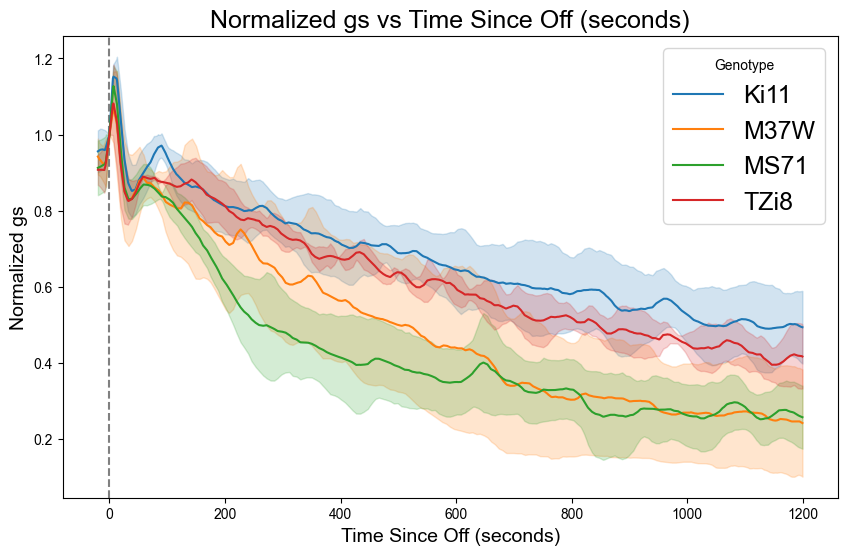

In [36]:
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 6))
plt.axvline(x=0, color='gray', linestyle='--')
# each line represents the mean value of normalized_gs for each genotype over time_since_off_sec
# the shaded band around each line represents the standard deviation
sns.lineplot(data=simulated_df, x='time_since_off_sec', y='normalized_gs_simulated', hue='genotype', ci = 'sd')
plt.title('Normalized gs vs Time Since Off (seconds)', fontsize=18)
plt.xlabel('Time Since Off (seconds)', fontsize=14)
plt.ylabel('Normalized gs', fontsize=14)
plt.legend(title='Genotype', fontsize=18)
plt.show()